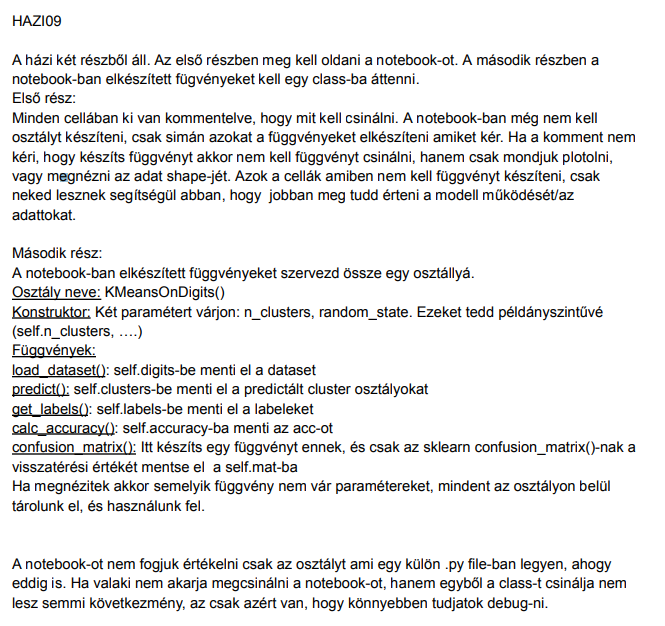

In [7]:
KMeansOnDigits()
load_dataset()
predict()
get_labels()
calc_accuracy()
confusion_matrix()

NameError: name 'KMeansOnDigits' is not defined

In [8]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits as load
from sklearn.cluster import k_means

In [9]:
# Készíts egy függvényt ami betölti a digits datasetet 
# NOTE: használd az sklearn load_digits-et
# Függvény neve: load_digits()
# Függvény visszatérési értéke: a load_digits visszatérési értéke
def load_dataset():
    return load()

In [10]:
# Vizsgáld meg a betöltött adatszetet (milyen elemek vannak benne stb.)
digits=load_dataset()
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

In [11]:
# Vizsgáld meg a data paraméterét a digits dataset-nek (tartalom,shape...)
print(digits.feature_names)
arr=np.array(digits.data)
# Each image is 8px * 8px that's why 64 pixels
print(arr.shape)
print(digits.target_names)
print(digits.target)


['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']
(1797, 64)
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 ... 8 9 8]


In [12]:
# Készíts egy függvényt ami létrehoz egy KMeans model-t 10 db cluster-el
# NOTE: használd az sklearn Kmeans model-jét (random_state legyen 0)
# Miután megvan a model predict-elj vele 
# NOTE: használd a fit_predict-et
# Függvény neve: predict(n_clusters:int,random_state:int,digits)
# Függvény visszatérési értéke: (model:sklearn.cluster.KMeans,clusters:np.ndarray)
def predict(n_clusters:int,random_state:int,digits):
    k=KMeans(n_clusters=n_clusters,random_state=random_state)
    pred=k.fit_predict(X=digits.data,y=digits.target)
    return (np.array(pred),k)
result=predict(10,0,digits)
print(result)


(array([5, 7, 7, ..., 7, 3, 3]), KMeans(n_clusters=10, random_state=0))


C:\Users\Akos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
# Vizsgáld meg a shape-jét a kapott model cluster_centers_ paraméterének.
print(result[0])

[5 7 7 ... 7 3 3]


[5 7 7 ... 7 3 3]


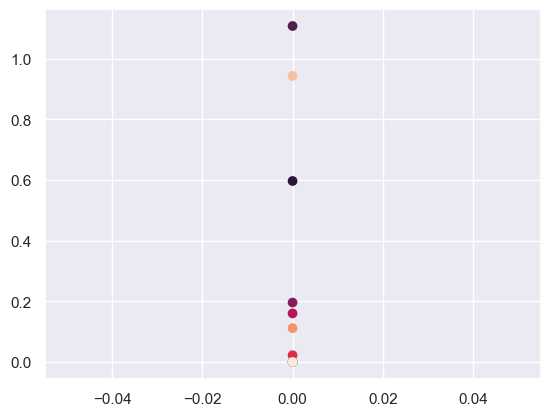

In [14]:
# Készíts egy plotot ami a cluster középpontokat megjeleníti
centers = result[1].cluster_centers_
print(result[1].labels_)
# Plot the data points and cluster centers
plt.scatter(centers[:, 0], centers[:, 1],c=digits.target_names)
plt.show()

In [21]:
# Készíts egy függvényt ami visszaadja a predictált cluster osztályokat
# NOTE: amit a predict-ből visszakaptunk "clusters" azok lesznek a predictált cluster osztályok
# HELP: amit a model predictált cluster osztályok még nem a labelek, hanem csak random cluster osztályok, 
#       Hogy label legyen belőlük:
#       1. készíts egy result array-t ami ugyan annyi elemű mint a predictált cluster array
#       2. menj végig mindegyik cluster osztályon (0,1....9)
#       3. készíts egy maszkot ami az adott cluster osztályba tartozó elemeket adja vissza
#       4. a digits.target-jét indexeld meg ezzel a maszkkal
#       5. számold ki ennel a subarray-nek a móduszát
#       6. a result array-ben tedd egyenlővé a módusszal azokat az indexeket ahol a maszk True 
#       Erre azért van szükség mert semmi nem biztosítja nekünk azt, hogy a "0" cluster a "0" label lesz, lehet, hogy az "5" label lenne az.

# Függvény neve: get_labels(clusters:np.ndarray, digits)
# Függvény visszatérési értéke: labels:np.ndarray
from scipy import stats


def get_labels(clusters: np.ndarray, digits):
    result = np.zeros_like(clusters)
    for cluster in range(10):
        mask = (clusters == cluster)
        target = digits.target[mask]
        mode = np.bincount(target).argmax()
        result[mask] = mode
    return result

labels=get_labels(result[0],digits)


In [17]:
# Készíts egy függvényt ami kiszámolja a model accuracy-jét
# Függvény neve: calc_accuracy(target_labels:np.ndarray,predicted_labels:np.ndarray)
# Függvény visszatérési értéke: accuracy:float
# NOTE: Kerekítsd 2 tizedes jegyre az accuracy-t

In [18]:
def calc_accuracy(target_labels:np.ndarray,predicted_labels:np.ndarray):
    return accuracy_score(target_labels,predicted_labels)

In [ ]:
# Készíts egy confusion mátrixot és plot-old seaborn segítségével

<Axes: >

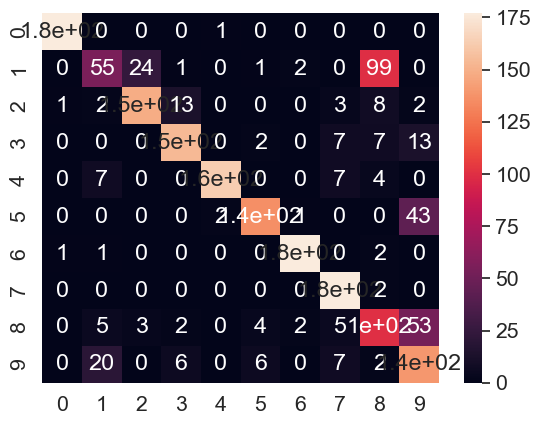

In [22]:

conf_matrix = confusion_matrix(digits.target,labels)
sns.heatmap(conf_matrix,annot=True)